In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-02-01 03:44:26--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   247MB/s    in 0.3s    

2022-02-01 03:44:26 (247 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

In [ ]:
import pandas as pd

In [ ]:
columns = ['SMILES', 'Adjudicated']
df = pd.read_csv("/content/drive/MyDrive/Datasets/EITLAI_CyclicLactones_ROP_v1.csv", header=0)
df.columns = columns

In [ ]:
df.head()

,SMILES,Adjudicated
0,O=COCC1COC(=O)OC1,accept
1,O=C1OCC(CC2CCCOC2=O)CO1,accept
2,C=C(C)C(=O)CC1COC(=O)OC1,accept
3,O=COCC(=O)CC1COC(=O)OC1,accept
4,CC[n+]1ccn(C2COC(=O)OC2)c1,accept


In [ ]:
df['Adjudicated'].value_counts()

0    125025
1       117
Name: Adjudicated, dtype: int64

In [ ]:
df['Adjudicated'].replace({'reject': 0, 'accept': 1}, inplace=True)

In [ ]:
from rdkit import Chem

df['object'] = df.apply(lambda row: Chem.MolFromSmiles(row.SMILES), axis=1)

In [ ]:
df

,SMILES,Adjudicated,object
0,O=COCC1COC(=O)OC1,1,<rdkit.Chem.rdchem.Mol object at 0x7ffb4a012df0>
1,O=C1OCC(CC2CCCOC2=O)CO1,1,<rdkit.Chem.rdchem.Mol object at 0x7ffb4a012ad0>
2,C=C(C)C(=O)CC1COC(=O)OC1,1,<rdkit.Chem.rdchem.Mol object at 0x7ffb4a00ed50>
3,O=COCC(=O)CC1COC(=O)OC1,1,<rdkit.Chem.rdchem.Mol object at 0x7ffb4a00e300>
4,CC[n+]1ccn(C2COC(=O)OC2)c1,1,<rdkit.Chem.rdchem.Mol object at 0x7ffb4a00e1c0>
...,...,...,...
125137,CCC[n+]1ccn(CC(CCC(Cn2cc[n+](CCCC3COC(=O)OC3)c...,0,<rdkit.Chem.rdchem.Mol object at 0x7ffb492bf210>
125138,CCCCCCCCNC(=NC(=O)c1cnnn1On1cc[n+](CCCCCCCOC=O...,0,<rdkit.Chem.rdchem.Mol object at 0x7ffb492bf260>
125139,CCCCC(CNC(=NC(=O)On1cc[n+](CCCCCCCOC=O)c1)NCCC...,0,<rdkit.Chem.rdchem.Mol object at 0x7ffb492bf2b0>
125140,O=COCCCCCCC[n+]1ccn(OCCCCCCC(CC2COC(=O)OC2)C[n...,0,<rdkit.Chem.rdchem.Mol object at 0x7ffb492bf300>


In [ ]:
from rdkit.Chem import Descriptors

df['desc_MolLogP'] = df.apply(lambda row: Descriptors.MolLogP(row.object), axis=1)
df['desc_MolWt'] = df.apply(lambda row: Descriptors.MolWt(row.object), axis=1)
df['NumRotatableBonds'] = df.apply(lambda row: Descriptors.NumRotatableBonds(row.object), axis=1)
df['heavy_atom_count'] = df.apply(lambda row: Descriptors.HeavyAtomCount(row.object), axis=1)

In [ ]:
df.drop(['SMILES', 'object'], axis=1, inplace=True)
df.head(10)

,Adjudicated,desc_MolLogP,desc_MolWt,NumRotatableBonds,heavy_atom_count
0,1,-0.0576,160.125,3,11
1,1,1.1127,214.217,2,15
2,1,1.3047,184.191,3,13
3,1,-0.0984,202.162,5,14
4,1,0.5034,197.214,2,14
5,1,1.0978,214.217,5,15
6,1,2.3089,214.261,6,15
7,1,2.2056,172.224,1,12
8,1,0.3584,144.126,1,10
9,1,1.6960,568.648,13,40


In [ ]:
X = df.drop('Adjudicated', axis=1)
y = df['Adjudicated']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=42)

X_os, y_os = os.fit_resample(X,y)

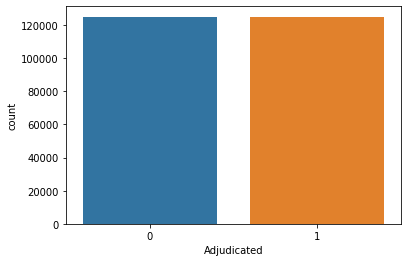

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y_os,label="Count")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, y_test.shape

((167533, 4), (82517,))

In [ ]:
X_train.head()

,desc_MolLogP,desc_MolWt,NumRotatableBonds,heavy_atom_count
55601,3.7255,549.563,19,38
77488,10.8145,1249.525,26,91
100095,5.3398,616.759,18,45
53727,2.3945,623.735,20,45
109823,-2.3233,1083.139,25,77


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(criterion='entropy', random_state=10)

dtree.fit(X_train, y_train)
y_pred= dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy= round(accuracy,4)
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.9998


In [ ]:
from joblib import dump

dump(dtree, "ml_model.joblib")

['ml_model.joblib']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled= sc.transform(X_train)
sc.fit(X_test)
X_test_scaled= sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

randomforest = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=7)
sgd = SGDClassifier(max_iter=500, tol=1e-3, random_state=45)
lr = LogisticRegression(max_iter=2000)

In [ ]:
algos={'Decision Tree': dtree,
       'Random Forest': randomforest,
       'K-Nearest Neighbours': knn,
       'Stochastic Gradient Descent': sgd,
       'Gaussian Naive Bayes': gnb,
       'Logistic Regression': lr}

accuracies = dict()

for name, algo in algos.items():
  algo.fit(X_train, y_train)
  y_pred= algo.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  accuracies[name] = round(acc,4)
  print("{}'s accuracy: {:.4f}".format(name,acc))

Decision Tree's accuracy: 0.9998
Random Forest's accuracy: 0.9998
K-Nearest Neighbours's accuracy: 0.9993
Stochastic Gradient Descent's accuracy: 0.9932
Gaussian Naive Bayes's accuracy: 0.9853
Logistic Regression's accuracy: 0.9936


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam

model=Sequential()
###first layer
model.add(Dense(4,input_shape=(4,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
###second layer
model.add(Dense(20))
model.add(Activation('relu'))
model.add(Dropout(0.4))
###third layer
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dropout(0.4))

###final layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 activation_8 (Activation)   (None, 4)                 0         
                                                                 
 dropout_6 (Dropout)         (None, 4)                 0         
                                                                 
 dense_9 (Dense)             (None, 20)                100       
                                                                 
 activation_9 (Activation)   (None, 20)                0         
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 40)               

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 20
num_batch_size = 800

checkpointer = ModelCheckpoint(filepath='model.h5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train_scaled, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)



204/210 [============================>.] - ETA: 0s - loss: 0.1388 - accuracy: 0.9143
Epoch 00019: val_loss did not improve from 12.39348
210/210 [==============================] - 1s 6ms/step - loss: 0.1387 - accuracy: 0.9144 - val_loss: 184.1412 - val_accuracy: 0.4987
Epoch 20/20
206/210 [============================>.] - ETA: 0s - loss: 0.1375 - accuracy: 0.9143
Epoch 00020: val_loss did not improve from 12.39348
210/210 [==============================] - 1s 5ms/step - loss: 0.1372 - accuracy: 0.9144 - val_loss: 187.3523 - val_accuracy: 0.4987
Training completed in time:  0:00:41.807798


In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)
SVC()

lsd = clf.predict(iris.data[:3])
lsd = np.around(lsd, 2)
lsd

TypeError: ignored

In [ ]:
np.round_([1.2132412, 3.5326475, 5.2256865, 5.34643743, 5.445744, 8.679821, 56.845638])

array([ 1.,  4.,  5.,  5.,  5.,  9., 57.])

In [ ]:
import random
mub = [random.random() for _ in range(10)]
mub = np.array(mub)
mub = np.round_(mub)
mub


array([1., 1., 0., 1., 1., 0., 0., 1., 0., 1.])

In [ ]:
mub = np.where(mub > 0, "Accepted", "Rejected")
mub

array(['Accepted', 'Accepted', 'Rejected', 'Accepted', 'Accepted',
       'Rejected', 'Rejected', 'Accepted', 'Rejected', 'Accepted'],
      dtype='<U8')

In [ ]:
type(mub)

numpy.ndarray

In [ ]:
names = ["Ethereum (ETH)", "Litecoin (LTC)", "Cardano (ADA)", "Polkadot (DOT)", "Bitcoin Cash (BCH)", "Stellar (XLM)", "Dogecoin (DOGE)",
         "Binance Coin (BNB)", "Tether (USDT)", "Chainlink (LINK)"]

fin = dict(zip(names,mub))
print(fin)

{'Ethereum (ETH)': 'Accepted', 'Litecoin (LTC)': 'Accepted', 'Cardano (ADA)': 'Rejected', 'Polkadot (DOT)': 'Accepted', 'Bitcoin Cash (BCH)': 'Accepted', 'Stellar (XLM)': 'Rejected', 'Dogecoin (DOGE)': 'Rejected', 'Binance Coin (BNB)': 'Accepted', 'Tether (USDT)': 'Rejected', 'Chainlink (LINK)': 'Accepted'}
